## This module about methods of ensamble: Boosting and Stacking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 2.20.2ubuntu2 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 1.13.1-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/stynic/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         1
1         1       1    0  38.0      1      0  71.2833         2
2         1       3    0  26.0      0      0   7.9250         1
3         1       1    0  35.0      1      0  53.1000         1
4         0       3    1  35.0      0      0   8.0500         1

In [3]:
y = titanic['Survived']
X = titanic.drop(columns='Survived')
trees = [1] + list(range(10, 100, 10))

In [4]:
def evaluate(model):
    scoring = []
    for tree in trees:
        this_model = model(n_estimators=tree)
        score = cross_val_score(this_model, X, y, 
                                scoring='roc_auc', cv=3)
        scoring.append(score)
    return np.asmatrix(scoring)

In [5]:
boosts = [AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]

In [6]:
%%time
ada_scoring = evaluate(boosts[0])
ada_scoring

CPU times: user 1.86 s, sys: 14 µs, total: 1.86 s
Wall time: 1.86 s


matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [7]:
%%time
gbc_scoring = evaluate(boosts[1])
gbc_scoring

CPU times: user 931 ms, sys: 1.93 ms, total: 933 ms
Wall time: 935 ms


matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83158374, 0.87364586, 0.88179465],
        [0.81703576, 0.8781996 , 0.8825616 ],
        [0.81797047, 0.87407727, 0.88186655],
        [0.81451922, 0.87117726, 0.88730707],
        [0.81375228, 0.8694037 , 0.88354424],
        [0.80979772, 0.87017065, 0.88102771],
        [0.80967788, 0.8715128 , 0.87635414],
        [0.81360847, 0.87177644, 0.87505992]])

In [8]:
%%time
xgb_scroing = evaluate(boosts[2])
xgb_scroing

CPU times: user 23.1 s, sys: 79.3 ms, total: 23.1 s
Wall time: 3.04 s


matrix([[0.8108283 , 0.86564088, 0.87714505],
        [0.80967788, 0.89497651, 0.86614419],
        [0.81658039, 0.88625252, 0.86156648],
        [0.8127936 , 0.88191449, 0.8582111 ],
        [0.81324897, 0.87800786, 0.85694085],
        [0.81125971, 0.87865497, 0.85698878],
        [0.81056466, 0.87760042, 0.85646151],
        [0.81032499, 0.87386157, 0.86183012],
        [0.80816796, 0.8758748 , 0.85881028],
        [0.80792829, 0.87395743, 0.85665325]])

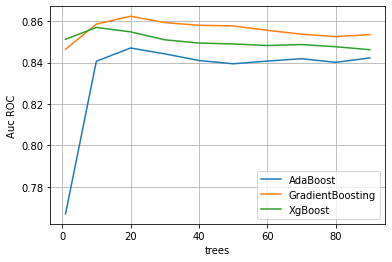

In [9]:
plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scroing.mean(axis=1), label='XgBoost')
plt.grid(True)
plt.legend()
plt.xlabel('trees')
plt.ylabel('Auc ROC')
plt.show()

## practice by boost

Когда дело доходит до оптимизации алгоритма, зачастую достаточно сложно подобрать сразу такие параметры, при которых качество классификатора было бы максимальным. В этом помогает либо опыт работы с различными методами, либо уже отмеченные другими специалистами взаимосвязи между количеством данных, самим алгоритмом, различными гиперпараметрами и т.п.

В случае с бустингом было отмечено, что количество деревьев, при котором качество алгоритма максимально, зависит от темпа обучения: чем меньше темп, тем больше деревьев обычно требуется. 

В этом задании попробуйте последовательно подобрать такие гиперпараметры n_estimators и learning_rate в алгоритме GBC, чтобы accuracy была равна 1: сначала последовательно увеличивайте количество базовых деревьев, не меняя при этом learning_rate, а затем поменяйте количество деревьев снова на 1 и уже меняйте гиперпараметр learning_rate в пределах (0, 1), не включая границы. Если  accuracy не будет равна 1 при граничном значении learning_rate, добавляйте по одному базовому алгоритму и смотрите, что получится (напомним, что зависимость нелинейная - при значительном увеличении learning_rate количество деревьев может увеличиться всего на одну-две позиции.

Сначала запустите следующий код со сгенерированными данными.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

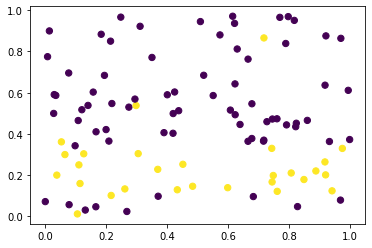

In [11]:
np.random.seed(15)
data = np.random.rand(100, 2)
targets = np.empty(100)
targets[1 / data[:, 1] > 2] = 1
targets[1 / data[:, 1] < 3] = 0
targets[1 / data[:, 1] > 10] = 0
targets[[1, 3, 6, 15, 36]] = 1

plt.scatter(data[:, 0], data[:, 1], s=40, c=targets)

In [12]:
score_estimators = []


for n_estimator in range(1, 100):
    gbc_model = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=0.1).fit(data, targets)
    predicted = gbc_model.predict(data)
    accuracy = accuracy_score(targets, predicted)
    score_estimators.append([n_estimator, accuracy])
    if accuracy == 1:
        print('best_estimators:', gbc_model)
        break


best_estimators: GradientBoostingClassifier(n_estimators=33)


In [13]:
score_learing_rates = []    
for learning_rate in np.arange(0.1, 1, 0.1):
    gbc_model = GradientBoostingClassifier(n_estimators=1, learning_rate=learning_rate).fit(data, targets)
    predicted = gbc_model.predict(data)
    accuracy = accuracy_score(targets, predicted)
    score_learing_rates.append([learning_rate, accuracy])
    if accuracy == 1:
        print('best2:', gbc_model)
        break
print('best_learning', max(score_learing_rates, key=lambda x: x[1]))

best_learning [0.30000000000000004, 0.98]


In [14]:
%%time
score_estimators_with_learn03 = []
for n_estimator in range(1, 100):
    gbc_model = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=0.3).fit(data, targets)
    predicted = gbc_model.predict(data)
    accuracy = accuracy_score(targets, predicted)
    score_estimators_with_learn03.append([n_estimator, accuracy])
    if accuracy == 1:
        print('best:', gbc_model)
        break
    

best: GradientBoostingClassifier(learning_rate=0.3, n_estimators=10)
CPU times: user 63.5 ms, sys: 266 µs, total: 63.7 ms
Wall time: 62.4 ms


In [15]:
score_estimators = np.array(score_estimators)
score_learing_rates = np.array(score_learing_rates)
score_estimators_with_learn03 = np.array(score_estimators_with_learn03)

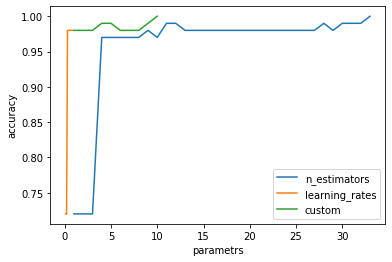

In [16]:
plt.plot(score_estimators[:, 0], score_estimators[:, 1], label='n_estimators')
plt.plot(score_learing_rates[:, 0], score_learing_rates[:, 1], label='learning_rates')
plt.plot(score_estimators_with_learn03[:, 0], score_estimators_with_learn03[:, 1], label='custom')
plt.xlabel('parametrs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [17]:
score_learing_rates[2]

array([0.3 , 0.98])

In [18]:
np.array(score_estimators)[:, 0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33.])

## homework for module pf emsemble

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


import pandas as pd

0    501
1    499
dtype: int64


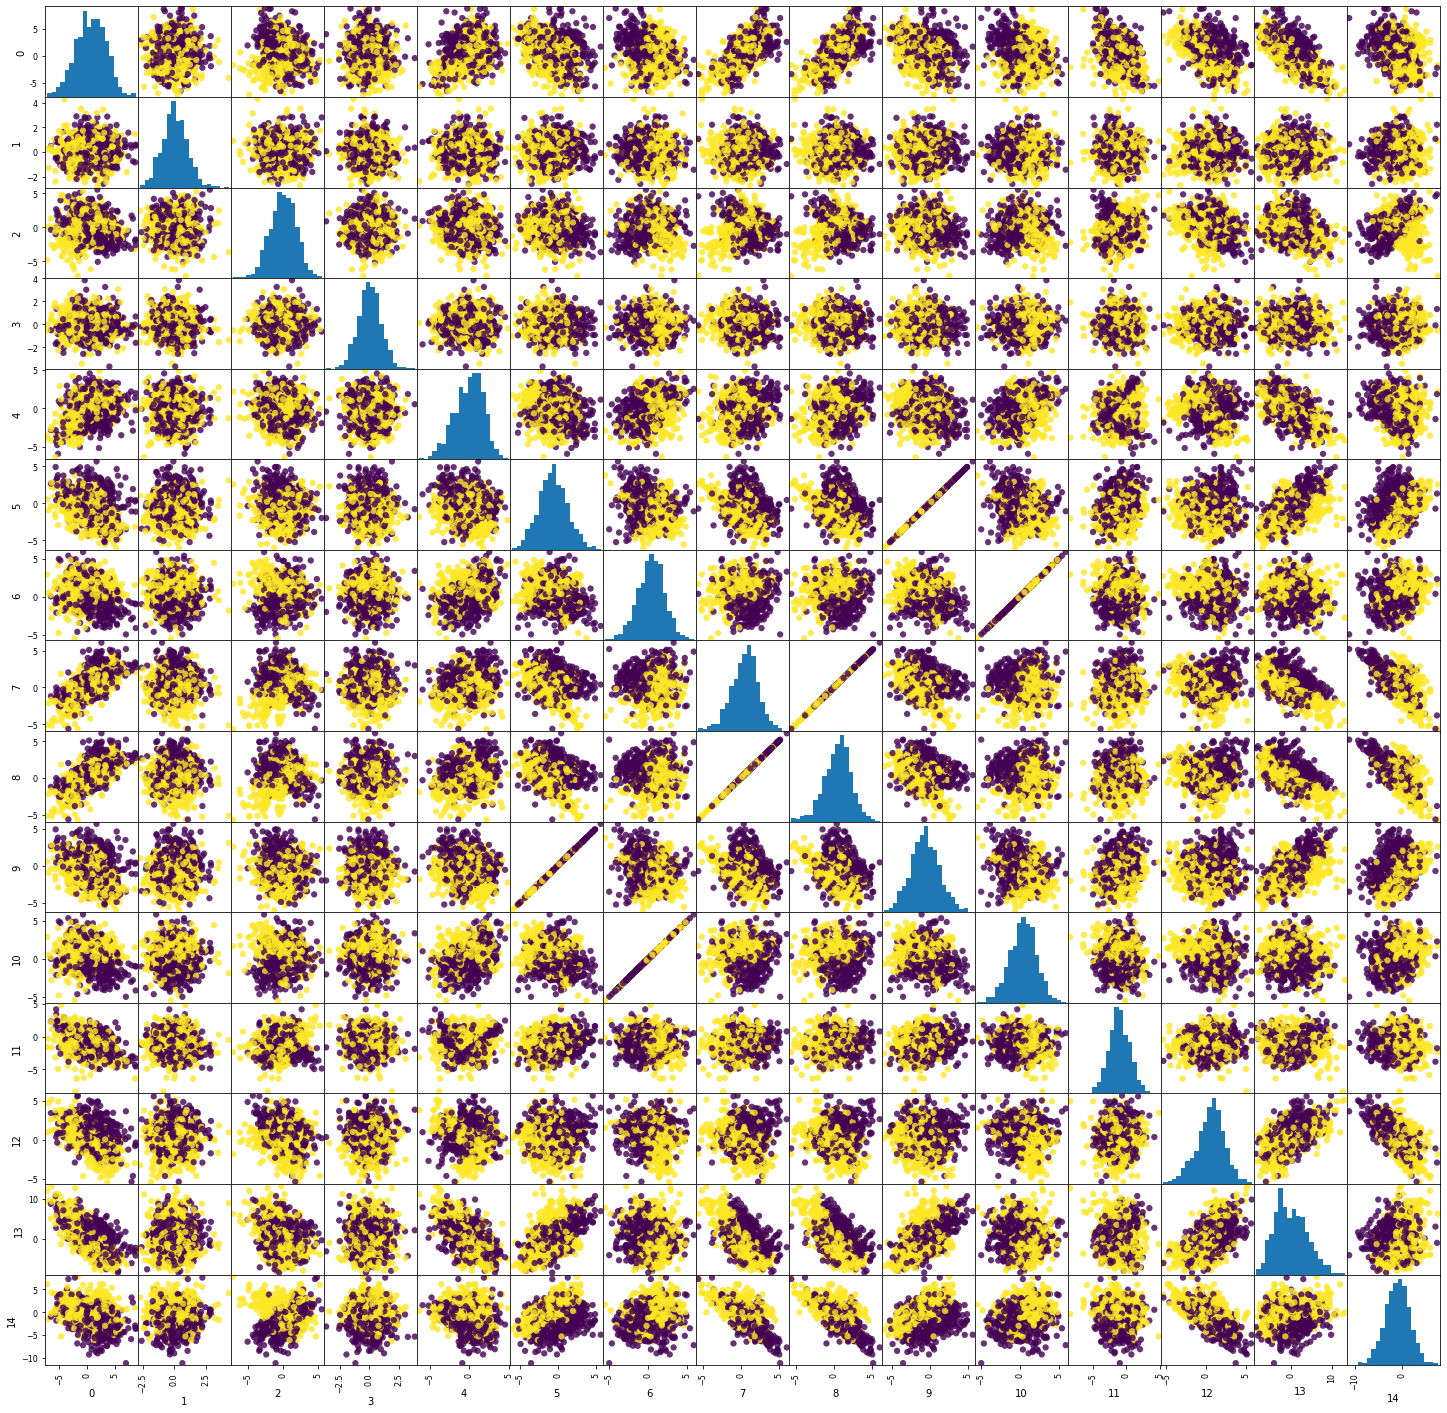

In [20]:
x, y = make_classification(n_samples=1000,
                           n_features=15, 
                           n_informative=7, n_redundant=3, n_repeated=3, random_state=17)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)
features = pd.DataFrame(x)
target = pd.Series(y)
print(target.value_counts())

scat_mtrx = pd.plotting.scatter_matrix(features,
                                       c=target,
                                       figsize=(25, 25),
                                       marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [21]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}
num_rounds = 20
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

[0]	train-logloss:0.65325	test-logloss:0.66343
[1]	train-logloss:0.62012	test-logloss:0.63856
[2]	train-logloss:0.59225	test-logloss:0.61802
[3]	train-logloss:0.56655	test-logloss:0.59999
[4]	train-logloss:0.54443	test-logloss:0.58840
[5]	train-logloss:0.52526	test-logloss:0.57064
[6]	train-logloss:0.50836	test-logloss:0.55665
[7]	train-logloss:0.49023	test-logloss:0.54734
[8]	train-logloss:0.47380	test-logloss:0.53869
[9]	train-logloss:0.45862	test-logloss:0.53187
[10]	train-logloss:0.44627	test-logloss:0.51961
[11]	train-logloss:0.43366	test-logloss:0.51053
[12]	train-logloss:0.42058	test-logloss:0.50064
[13]	train-logloss:0.40988	test-logloss:0.49537
[14]	train-logloss:0.40141	test-logloss:0.48768
[15]	train-logloss:0.39375	test-logloss:0.48188
[16]	train-logloss:0.38457	test-logloss:0.47386
[17]	train-logloss:0.37775	test-logloss:0.47245
[18]	train-logloss:0.37156	test-logloss:0.46815
[19]	train-logloss:0.36540	test-logloss:0.46157


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

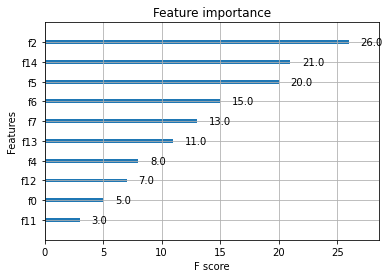

In [22]:
xgb.plot_importance(xgb_model)

In [23]:
x, y = make_classification(n_samples=1000, n_features=7,
                           n_informative=3, n_redundant=3, 
                           n_classes=2, weights=[.9, .1],
                           random_state=20)
features = pd.DataFrame(x)
targets = pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=20)
print(targets.value_counts())

0    896
1    104
dtype: int64


In [24]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 1}
num_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

print('\n')
predicted = xgb_model.predict(dtest) > 0.5
cm = confusion_matrix(y_test, predicted, labels=[1, 0], )
print(cm)
print('precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

[0]	train-logloss:0.26413	test-logloss:0.30880
[1]	train-logloss:0.15144	test-logloss:0.24299
[2]	train-logloss:0.12956	test-logloss:0.23367
[3]	train-logloss:0.10708	test-logloss:0.22210
[4]	train-logloss:0.08907	test-logloss:0.21151
[5]	train-logloss:0.07864	test-logloss:0.22941
[6]	train-logloss:0.06794	test-logloss:0.22334
[7]	train-logloss:0.06096	test-logloss:0.20994
[8]	train-logloss:0.05003	test-logloss:0.20906
[9]	train-logloss:0.04639	test-logloss:0.21061


[[ 25  14]
 [  5 256]]
precision:  0.8333333333333334
recall:  0.6410256410256411


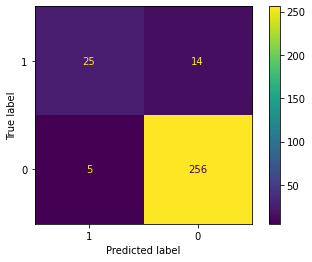

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=[1, 0])
disp.plot()
plt.show()

In [26]:
# change weight with hand
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

weights = np.zeros(len(y_train))
weights[y_train == 0] = 1
weights[y_train == 1] = 5



dtrain = xgb.DMatrix(x_train, y_train, weight=weights)
dtest = xgb.DMatrix(x_test, y_test)
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 1}
num_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

print('\n')
predicted = xgb_model.predict(dtest) > 0.5
cm = confusion_matrix(y_test, predicted, labels=[1, 0], )
print(cm)
print('precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

[0]	train-logloss:0.34705	test-logloss:0.32925
[1]	train-logloss:0.22954	test-logloss:0.24404
[2]	train-logloss:0.18897	test-logloss:0.25488
[3]	train-logloss:0.14780	test-logloss:0.23705
[4]	train-logloss:0.12850	test-logloss:0.21703
[5]	train-logloss:0.10893	test-logloss:0.20647
[6]	train-logloss:0.09107	test-logloss:0.20868
[7]	train-logloss:0.07710	test-logloss:0.20870
[8]	train-logloss:0.06994	test-logloss:0.21683
[9]	train-logloss:0.06268	test-logloss:0.21690


[[ 29  10]
 [ 12 249]]
precision:  0.7073170731707317
recall:  0.7435897435897436


In [27]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

#balanced
scale = pd.value_counts(y_train)
scale_weight = scale[0] / scale[1]

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 1,
          'scale_pos_weight': scale_weight}
num_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params, dtrain, num_rounds,evals=evals)

print('\n')
predicted = xgb_model.predict(dtest) > 0.5
cm = confusion_matrix(y_test, predicted, labels=[1, 0], )
print(cm)
print('precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

[0]	train-logloss:0.37263	test-logloss:0.36848
[1]	train-logloss:0.22881	test-logloss:0.28310
[2]	train-logloss:0.20647	test-logloss:0.24196
[3]	train-logloss:0.16875	test-logloss:0.23563
[4]	train-logloss:0.13292	test-logloss:0.24015
[5]	train-logloss:0.10590	test-logloss:0.22858
[6]	train-logloss:0.08802	test-logloss:0.22758
[7]	train-logloss:0.07510	test-logloss:0.22404
[8]	train-logloss:0.06695	test-logloss:0.23958
[9]	train-logloss:0.05316	test-logloss:0.23974


[[ 28  11]
 [ 11 250]]
precision:  0.717948717948718
recall:  0.717948717948718


## Task of Working with stacking and blending

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

In [29]:
titanic = pd.read_csv('titanic.csv')
targets = titanic.Survived
data = titanic.drop(columns='Survived')

x_train, x_test, y_train, y_test = train_test_split(data, targets,
                                                    train_size=0.8,
                                                    random_state=0)

In [30]:
train, valid, train_true, valid_true = train_test_split(x_train,
                                                        y_train,
                                                        train_size=0.5,
                                                        random_state=0)

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(train, train_true)

lr = LogisticRegression(random_state=17, max_iter=120)
lr_model = lr.fit(train, train_true)

dtc = DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)
dtc_model = dtc.fit(train, train_true)

svc = SVC(random_state=17)
svc_model = svc.fit(train, train_true)

In [32]:
models = [knn_model, lr_model, dtc_model, svc_model]
# (count of objects, algorithms)
meta_mtrx = np.empty((valid.shape[0], len(models)))
meta_mtrx_test = np.empty((x_test.shape[0], len(models))) 

#meta features of train data for meta-algorithm
for n, model in enumerate(models):
    meta_mtrx[:, n] = model.predict(valid)
    #Check score by base model
    predicted = model.predict(x_test)
    print(f'{n} auc: {roc_auc_score(y_test, predicted)} \n{model=}\n')

    #meta test features of test data for meta-algorithm
for n, model in enumerate(models):
    meta_mtrx_test[:, n] = model.predict(x_test)

    
meta_model = XGBClassifier(n_estimators=40).fit(meta_mtrx, valid_true)
meta_predict = meta_model.predict(meta_mtrx_test)
print(f'Stacking AUC: {roc_auc_score(y_test, meta_predict)}')

0 auc: 0.7080368906455863 
model=KNeighborsClassifier(n_neighbors=3)

1 auc: 0.8094861660079051 
model=LogisticRegression(max_iter=120, random_state=17)

2 auc: 0.7877470355731225 
model=DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)

3 auc: 0.6538866930171279 
model=SVC(random_state=17)

Stacking AUC: 0.7868906455862978


In [33]:
dtc_model

DecisionTreeClassifier(max_leaf_nodes=4, random_state=17)

## Blending

In [34]:
# import base modules
import pandas as pd
import numpy as np

# import modules for spliting data, models and metrics
from sklearn.model_selection import train_test_split
#base algorthms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# meta algorithm
import xgboost as xgb
# metrics
from sklearn.metrics import roc_auc_score

In [35]:
# get data

titanic = pd.read_csv('titanic.csv')
y = titanic['Survived']
x = titanic.drop(columns=['Survived'])

# split data into 2 parts are train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=.7,
                                                    random_state=17)
# devide train into two parts
train, valid, train_true, valid_true  = train_test_split(x_train,
                                                         y_train,
                                                         train_size=.7,
                                                         random_state=17)

In [36]:
# train base algorithms
tree = DecisionTreeClassifier().fit(train, train_true)
knn = KNeighborsClassifier(n_neighbors=5).fit(train, train_true)
bayes = GaussianNB().fit(train, train_true)
log_model = LogisticRegression().fit(train, train_true)
models = [tree, knn, bayes, log_model]

#matrix for train meta
meta_matrix = np.empty((valid.shape[0], len(models)))
#matrix for test meta
meta_matrix_test = np.empty((y_test.shape[0], len(models)))

for n, model in enumerate(models):
    #forming train meta features for meta algorithm
    meta_matrix[:, n] = model.predict(valid)
    #forming test meta features for meta algorithm
    meta_matrix_test[:, n] = model.predict(x_test)
    print(f'Auc is equal to \nscore: {roc_auc_score(y_test, meta_matrix_test[:, n])}\n{model=}\n')
    

meta_model = xgb.XGBClassifier(n_estimators=40).fit(meta_matrix, valid_true)
predicted = meta_model.predict(meta_matrix_test)
print(f'Auc is equal to \nscore: {(roc_auc_score(y_test, predicted))}\nmeta alg\n')


Auc is equal to 
score: 0.7923911172318816
model=DecisionTreeClassifier()

Auc is equal to 
score: 0.6625351466115798
model=KNeighborsClassifier()

Auc is equal to 
score: 0.7550352900671372
model=GaussianNB()

Auc is equal to 
score: 0.7523957078097205
model=LogisticRegression()

Auc is equal to 
score: 0.7847018993515809
meta alg



## Blending with the way to average

In [37]:
# import base modules
import pandas as pd
import numpy as np

# import modules for spliting data, models and metrics
from sklearn.model_selection import train_test_split
#base algorthms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# meta algorithm
import xgboost as xgb
# metrics
from sklearn.metrics import roc_auc_score

#------------------------
# get data and split data
titanic = pd.read_csv('titanic.csv')
y = titanic['Survived']
x = titanic.drop(columns=['Survived'])

# split data into 2 parts are train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=.7,
                                                    random_state=17)
# devide train into two parts
train, valid, train_true, valid_true  = train_test_split(x_train,
                                                         y_train,
                                                         train_size=.7,
                                                         random_state=17)

def evaluate_meta(train, valid, train_true, valid_true):
    #----------------------
    # train base algorithms
    tree = DecisionTreeClassifier().fit(train, train_true)
    knn = KNeighborsClassifier(n_neighbors=5).fit(train, train_true)
    bayes = GaussianNB().fit(train, train_true)
    log_model = LogisticRegression().fit(train, train_true)
    models = [tree, knn, bayes, log_model]

    #matrix for train meta
    meta_matrix = np.empty((valid.shape[0], len(models)))
    #matrix for test meta
    meta_matrix_test = np.empty((y_test.shape[0], len(models)))

    for n, model in enumerate(models):
        #forming train meta features for meta algorithm
        meta_matrix[:, n] = model.predict(valid)
        #forming test meta features for meta algorithm
        meta_matrix_test[:, n] = model.predict(x_test)
        # print(f'Auc is equal to \nscore: {roc_auc_score(y_test, meta_matrix_test[:, n])}\n{model=}\n')


    meta_model = xgb.XGBClassifier(n_estimators=40).fit(meta_matrix, valid_true)
    predicted = meta_model.predict(meta_matrix_test)
    auc = roc_auc_score(y_test, predicted)
    print(f'Auc is equal to \nscore: {auc}\nmeta alg\n')
    return auc

results_meta = []
results_meta.append(evaluate_meta(train, valid, train_true, valid_true))
results_meta.append(evaluate_meta(valid, train, valid_true, train_true))
print(f'Blending mean is equal to \nscore: {np.mean(results_meta)}')

Auc is equal to 
score: 0.7801973948470764
meta alg



/home/stynic/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Auc is equal to 
score: 0.7521661789177713
meta alg

Blending mean is equal to 
score: 0.7661817868824239


In [38]:
print(titanic.shape)
titanic.head()

(891, 8)


Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         1
1         1       1    0  38.0      1      0  71.2833         2
2         1       3    0  26.0      0      0   7.9250         1
3         1       1    0  35.0      1      0  53.1000         1
4         0       3    1  35.0      0      0   8.0500         1

## Some train with CatBoost

In [39]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier().fit(train, train_true, 
                              verbose=False,
                              plot=True)
predicted = cat.predict(x_test)
print(f'auc: {roc_auc_score(y_test, predicted)} \n{cat=}\n')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

auc: 0.7831525793309233 
cat=<catboost.core.CatBoostClassifier object at 0x7f8258e26280>



/tmp/ipykernel_94007/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

## logistic rehression

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [51]:
p.shape, odds.shape

AttributeError: 'list' object has no attribute 'shape'

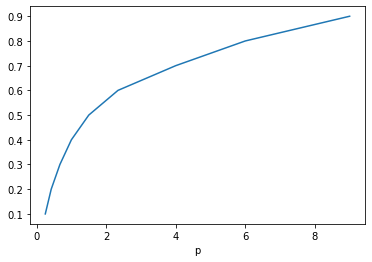

In [59]:
p = np.arange(0.1, 1, 0.1)
odds = np.array([0.25, .42, .67, 1, 1.5, 2.34, 4, 6, 9])
plt.plot(odds, p)
plt.xlabel('odds')
plt.xlabel('p')
plt.show()

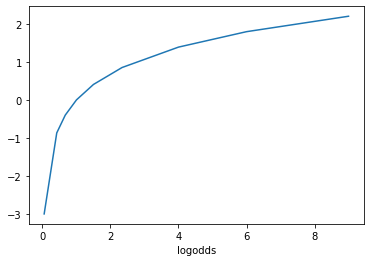

In [63]:
p = np.arange(0.1, 1, 0.1)
odds = np.array([0.05, .42, .67, 1, 1.5, 2.34, 4, 6, 9])
plt.plot(odds, np.log(odds))
plt.xlabel('odds')
plt.xlabel('logodds')
plt.show()

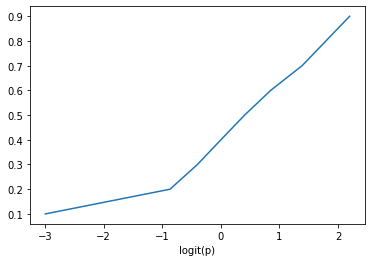

In [65]:
p = np.arange(0.1, 1, 0.1)
odds = np.array([0.05, .42, .67, 1, 1.5, 2.34, 4, 6, 9])
logit = np.log(odds)

plt.plot(logit, p)
plt.xlabel('p')
plt.xlabel('logit(p)')
plt.show()

In [70]:
np.log(.3/.8)

-0.9808292530117264

In [77]:
np.log(.05/.2)

-1.3862943611198906

In [79]:
np.exp(-1) / (1 + np.exp(-1))

0.2689414213699951

In [84]:
p_poss = 24/41
p_neg = 1 - p_poss
odds = p_poss / p_neg
log_odds = np.log(odds)
log_odds

0.3448404862917294

In [14]:
import numpy as np

def odds(p):
    return np.log(p / (1 - p))

survived = 290
dead = 424
n = survived + dead

intercept = odds(survived/n)
intercept

-0.379852532251438

## 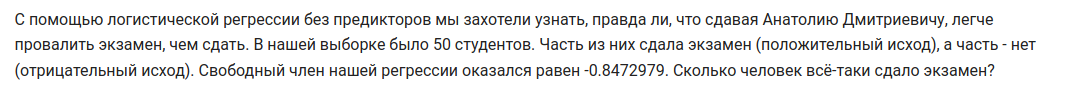

In [33]:
import numpy as np

n = 50 
intercept = -0.8472979
positive = n * np.exp(intercept) / (1 + np.exp(intercept))
positive

14.999999584065641

In [129]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf


# get target feature and one categorical feature
columns = ['Survived', 'Sex']
titanic = pd.read_csv('titanic.csv')
data = titanic[columns]
x = data['Sex']
y = data['Survived']

glm_binom_rstyle = smf.glm(formula="Survived ~ C(Sex)", data=data, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()
print( res_rstyle.aic)
print( res_rstyle.summary() )

921.8039249773076
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Fri, 17 Jun 2022   Deviance:                       917.80
Time:                        13:18:04   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.12

In [118]:
men_survived = data.query('Sex==1 and Survived==1').count()[0]
men_died = data.query('Sex==1 and Survived==0').count()[0]

women_survived = data.query('Sex==0 and Survived==1').count()[0]
women_died = data.query('Sex==0 and Survived==0').count()[0]

odds_men = men_survived/men_died
odds_women = women_survived/women_died
intercept = np.log(odds_women)
intercept

1.0565892988932617

In [119]:
np.exp(1.1243) + np.exp(-2.4778)

3.161989115096665

In [126]:
odds_women = np.exp(1.1243)
odds_men = np.exp(-2.4778 + 1.1243)
odds_ratio_women = odds_women/odds_men
odds_ratio_women

11.91502251280961

In [9]:
import numpy as np

odds_man = 40/90
odds_women = 50/90

np.log(odds_man/odds_women)

-0.22314355131420985

In [10]:
np.log(odds_man) - np.log(odds_women)

-0.22314355131420982

In [36]:
# case yaroslav
import numpy

def odds(p):
    return np.log(p/(1-p))

drug1 = (70, 30)
drug2 = (70, 30)
n = 200

odds_drug1 = odds(drug1[1]/n)
odds_drug2 = odds(drug2[1]/n)
intercept = odds_drug1
coef1 = odds_drug2 / odds_drug1
print(intercept, coef1)

-1.7346010553881064 1.0


In [37]:
# case tolya
import numpy

def odds(p):
    return np.log(p/(1-p))

drug1 = (50, 50)
drug2 = (70, 30)
n = 200

odds_drug1 = odds(drug1[1]/n)
odds_drug2 = odds(drug2[1]/n)
intercept = odds_drug1
coef1 = odds_drug2 / odds_drug1
print(intercept, coef1)

-1.0986122886681098 1.5789019231625658


In [38]:
# case Polina
import numpy

def odds(p):
    return np.log(p/(1-p))

drug1 = (70, 30)
drug2 = (30, 70)
n = 200

odds_drug1 = odds(drug1[1]/n)
odds_drug2 = odds(drug2[1]/n)
intercept = odds_drug1
coef1 = odds_drug2 / odds_drug1
print(intercept, coef1)

-1.7346010553881064 0.35687699282975316


In [39]:
# case Vanya
import numpy

def odds(p):
    return np.log(p/(1-p))

drug1 = (50, 50)
drug2 = (50, 50)
n = 200

odds_drug1 = odds(drug1[1]/n)
odds_drug2 = odds(drug2[1]/n)
intercept = odds_drug1
coef1 = odds_drug2 / odds_drug1
print(intercept, coef1)

-1.0986122886681098 1.0


In [57]:
# case Tolya

import numpy
import pandas as pd

def odds(p):
    return np.log(p/(1-p))

data = pd.read_csv('titanic.csv')
columns = ['Survived', 'Sex', 'Pclass']
data = data[columns]

female = (data
 .query('Sex==0')
 .groupby(['Pclass', 'Survived'])
 .agg({'Survived': 'count'}))
male = (data
 .query('Sex==1')
 .groupby(['Pclass', 'Survived'])
 .agg({'Survived': 'count'}))

In [58]:
female

Survived
Pclass Survived          
1      0                3
       1               91
2      0                6
       1               70
3      0               72
       1               72

In [59]:
male

Survived
Pclass Survived          
1      0               77
       1               45
2      0               91
       1               17
3      0              300
       1               47

In [78]:
# calculate coef for analysis with log regression for two categorical valiables 
# without intersection

odds_female_p1 = 91 / 3
odds_male_p1 = 45 / 77
odds_female_p2 = 70 / 6
odds_female_p3 = 72 / 72

intercept = np.log(odds_female_p1)
print(f'{intercept=}')
SexMale = np.log(odds_male_p1/odds_female_p1)
print(f'{SexMale=}')
PclassSecond = np.log(odds_female_p2/odds_female_p1)
print(f'{PclassSecond=}')
PclassThird = np.log(odds_female_p3/odds_female_p1)
print(f'{PclassThird=}')

intercept=3.41224721784874
SexMale=-3.9493901499321042
PclassSecond=-0.9555114450274363
PclassThird=-3.41224721784874


In [105]:
# variables(drug1, drug 2) and female or male
# case about Tolya

def exp(p):
    return np.exp(p / (1 + p))
    
odds_drug1_female = 35 / 65
odds_drug2_female = 35 / 65
odds_drug1_male = 65 / 35

print(f'Tolya')
intercept = np.exp(np.log(odds_drug1_female))
print(f'{intercept=}')
DrugsDrug2 = exp(np.log(odds_drug2_female / odds_drug1_female))
print(f'{DrugsDrug2=}')
SexMale = exp(np.log(odds_drug1_male / odds_drug1_female))
print(f'{SexMale=}')


Tolya
intercept=0.5384615384615384
DrugsDrug2=1.0
SexMale=1.7387876737588472


In [107]:
# variables(drug1, drug 2) and female or male
# case about Yaroslav

def exp(p):
    return np.exp(p / (1 + p))
    
odds_drug1_female = 10 / 10
odds_drug2_female = 10 / 10
odds_drug1_male = 10 / 10

print(f'Yaroslav')
intercept = np.exp(np.log(odds_drug1_female))
print(f'{intercept=}')
DrugsDrug2 = exp(np.log(odds_drug2_female / odds_drug1_female))
print(f'{DrugsDrug2=}')
SexMale = exp(np.log(odds_drug1_male / odds_drug1_female))
print(f'{SexMale=}')


Yaroslav
intercept=1.0
DrugsDrug2=1.0
SexMale=1.0


In [109]:
# variables(drug1, drug 2) and female or male
# case about Polina

def exp(p):
    return np.exp(p / (1 + p))
    
odds_drug1_female = 20 / 80
odds_drug2_female = 70 / 70
odds_drug1_male = 80 / 20

print(f'Polina')
intercept = np.exp(np.log(odds_drug1_female))
print(f'{intercept=}')
DrugsDrug2 = exp(np.log(odds_drug2_female / odds_drug1_female))
print(f'{DrugsDrug2=}')
SexMale = exp(np.log(odds_drug1_male / odds_drug1_female))
print(f'{SexMale=}')


Polina
intercept=0.25
DrugsDrug2=4.0
SexMale=15.999999999999998


In [118]:
# variables(drug1, drug 2) and female or male
# case about Ivan

def exp(p):
    return np.exp(p / (1 + p))
    
odds_drug1_female = 70 / 70
odds_drug2_female = 20 / 80
odds_drug1_male = 70 / 70

print(f'Ivan')
intercept = np.exp(np.log(odds_drug1_female))
print(f'{intercept=}')
DrugsDrug2 = np.exp(np.log(odds_drug2_female / odds_drug1_female))
print(f'{DrugsDrug2=}')
SexMale = np.exp(np.log(odds_drug1_male / odds_drug1_female))
print(f'{SexMale=}')


Ivan
intercept=1.0
DrugsDrug2=0.25
SexMale=1.0


In [131]:
def prob(p):
    return np.exp(p) / (1 + np.exp(p))

odds_drug2_female = 20 / 80
print(f'{odds_drug2_female=}')
np.exp(np.log(odds_drug2_female))
probability = prob(np.log(odds_drug2_female))
print(f'{probability=}')


odds_drug2_female=0.25
probability=0.2


In [42]:
# case Tolya

import numpy
import pandas as pd

def odds(p):
    return np.log(p/(1-p))

data = pd.read_csv('titanic.csv')
columns = ['Survived', 'Sex', 'Pclass']
data = data[columns]

female = (data
 .query('Sex==0')
 .groupby(['Pclass', 'Survived'])
 .agg({'Survived': 'count'}))
male = (data
 .query('Sex==1')
 .groupby(['Pclass', 'Survived'])
 .agg({'Survived': 'count'}))

In [47]:
100 / 3.125

32.0

In [46]:
5 / 1.6

3.125

In [83]:
odds_placebo_male

0.052631578947368425

In [84]:
odds_placebo_female

0.625

In [ ]:
6 / 6

## Solve task:
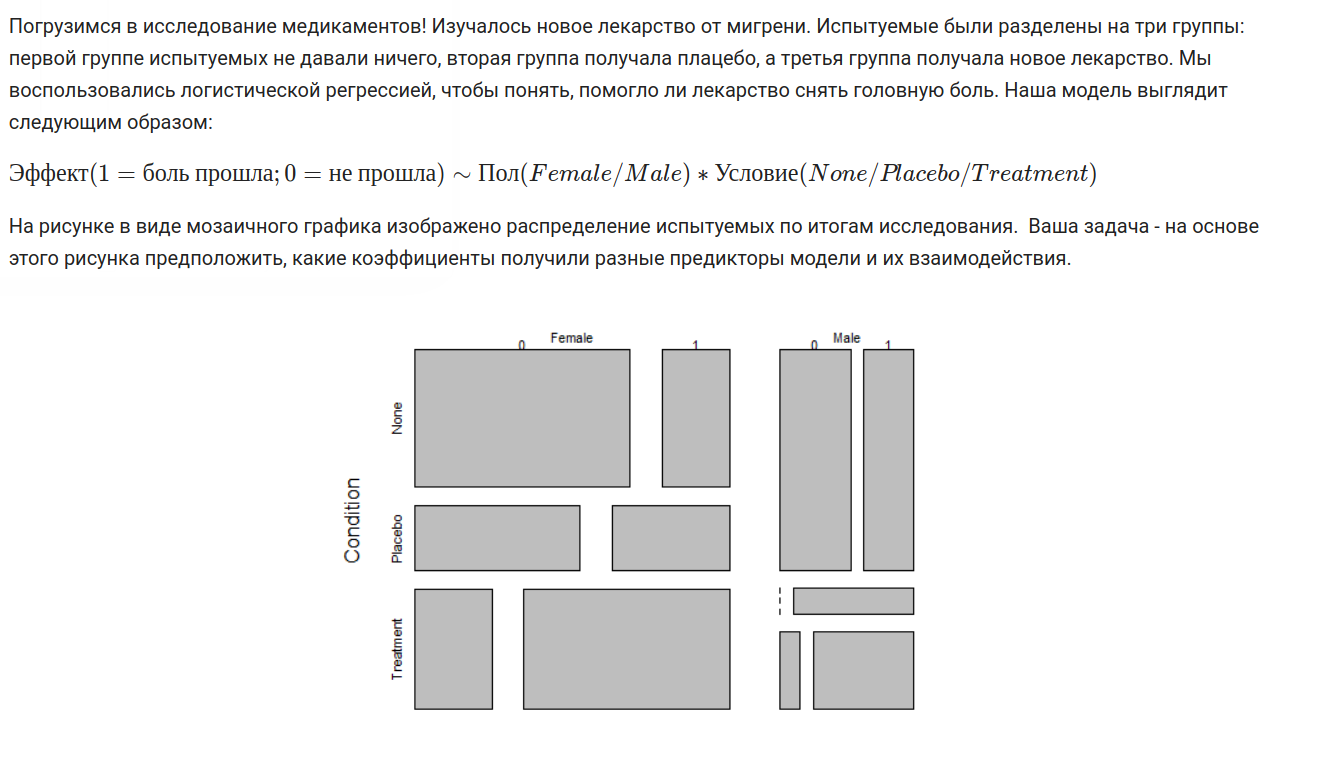
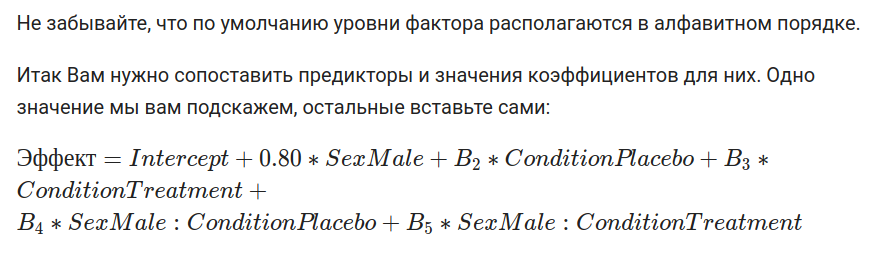

In [127]:
# women 1 class
p = 3.3081
np.exp(p)

27.33314313236718

In [130]:
# man 3 class
p = 2.1542 - 3,7301

p = np.exp(p)
p

8.620990627014335

In [133]:
# man 3 class
p = -0.4204

p = np.exp(p)
p

0.6567840536438686

In [108]:
38 / 215

0.17674418604651163

In [122]:
p = 2.1542 - 3.7301

p = np.exp(p) / (1 + np.exp(p))
p

0.17137692598509122

In [88]:
# pills(None, Placebo, Treatment) and sex(Female, male)
import numpy as np


odds_none_female = 8 / 24
odds_none_male = 9 / 12
odds_placebo_female = 5 / 8
odds_placebo_male = 2.9 / 0.1
odds_treatment_female = 18 / 7
odds_treatment_male = 5 / 1


intercept = np.log(odds_none_female)
SexMale = np.log(odds_none_male / odds_none_female)
ConditionPlacebo = np.log(odds_placebo_female / odds_none_female)
ConditionTreatment = np.log(odds_treatment_female / odds_none_female)

SexMale_Placebo = (np.log(odds_placebo_male / odds_placebo_female) -
                   np.log(odds_none_male / odds_none_female))

SexMale_Treatment = (np.log(odds_treatment_male / odds_treatment_female) -
                     np.log(odds_none_male / odds_none_female))

print(f'{intercept=}')
print(f'{SexMale=}')
print(f'{ConditionPlacebo=}')
print(f'{ConditionTreatment=}')
print(f'{SexMale_Placebo=}')
print(f'{SexMale_Treatment=}')

intercept=-1.0986122886681098
SexMale=0.8109302162163288
ConditionPlacebo=0.6286086594223741
ConditionTreatment=2.043073897508961
SexMale_Placebo=3.0263692430158806
SexMale_Treatment=-0.14595391262307988


In [93]:
x = -1.15 + 0.8 + 2.13 - 0.17
np.exp(x) / (1 + np.exp(x))

0.8334113864245404

## Getting and preparing data

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons


In [3]:
x, y = make_moons(15000, noise=0.3, random_state=17)

In [9]:
train, test, train_true, test_true = train_test_split(
x, y, train_size=0.7, random_state=17)

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train, train_true, train_size=0.6, random_state=17)

## Visiualise traid dataset

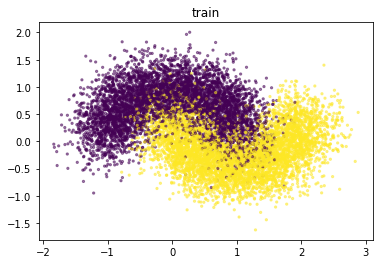

In [29]:
plt.scatter(train[:, 0], train[:, 1], 
            c=train_true,
            s=5,
            alpha=0.5)
plt.title('train')
plt.show()

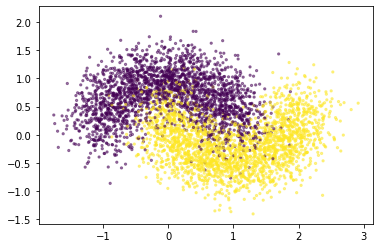

In [30]:
plt.scatter(test[:, 0], test[:,1], c=test_true,
           s=5, alpha=0.5)

## imports

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

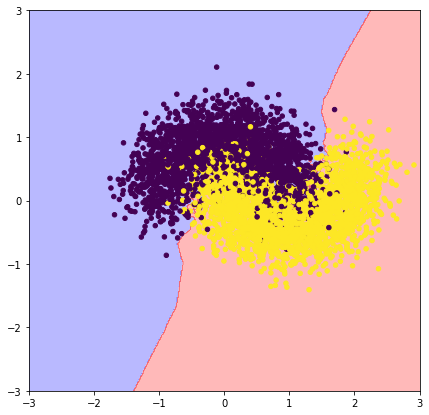

In [88]:
xx, yy = np.meshgrid(np.linspace(-3., 3., 500), np.linspace(-3., 3., 500))
xx.ravel().shape
# fill algorithm
Z = knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#build figure
plt.figure(figsize=(7, 7))
# contour for algorithm with by splitting
plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.bwr, alpha=0.3)
plt.scatter(test[:, 0], test[:, 1], s=20, c=test_true)

In [84]:
xx.shape

(500, 500)

In [98]:
def plot(alg, data, targets, label):
    xx, yy = np.meshgrid(np.linspace(-3., 3., 500), np.linspace(-3., 3., 500))
    Z = alg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(7, 7))
    plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.bwr, alpha=0.3)
    
    plt.scatter(data[:, 0], data[:, 1], s=20, c=targets, alpha=0.05)
    
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))
    plt.title(label)

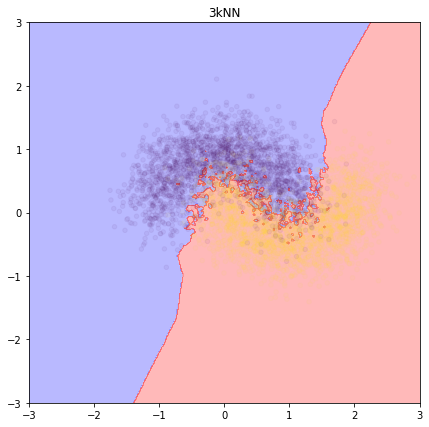

In [99]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train, y_train)
plot(knn1, test, test_true, '3kNN')

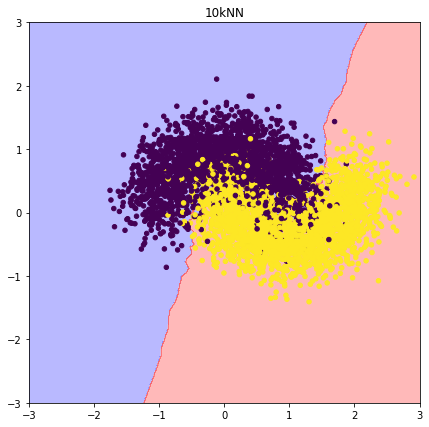

In [36]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train, y_train)
plot(knn2, test, test_true, '10kNN')

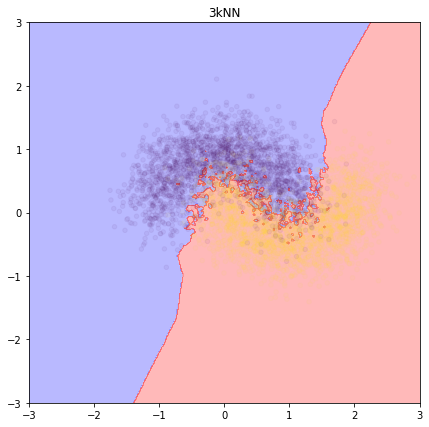

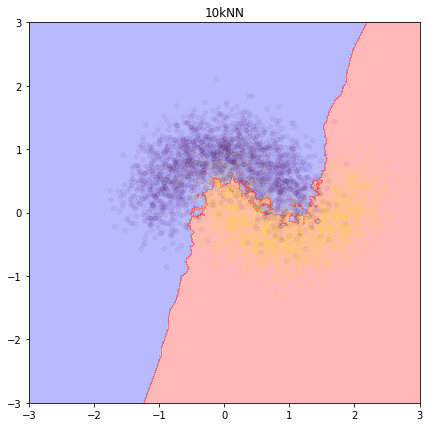

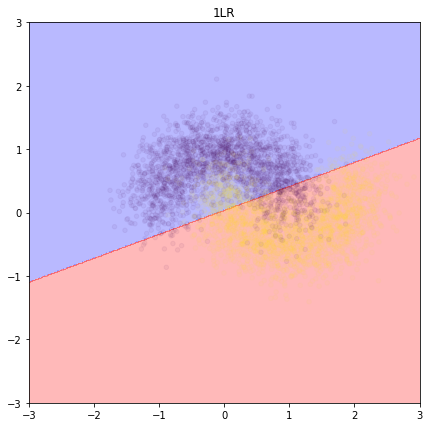

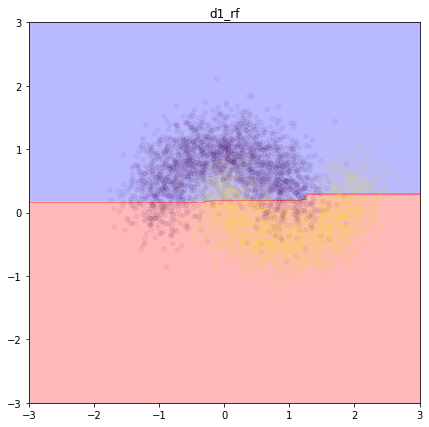

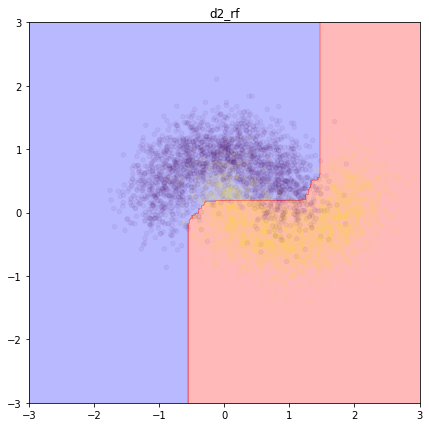

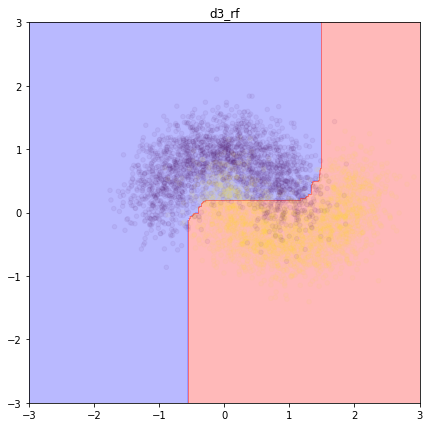

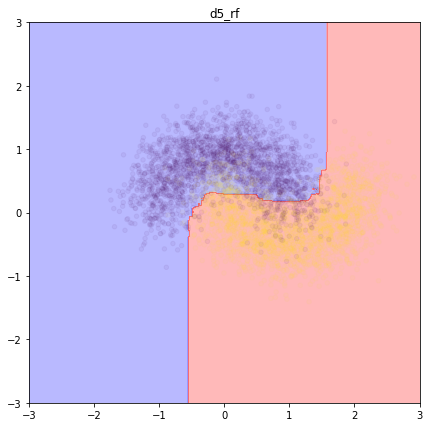

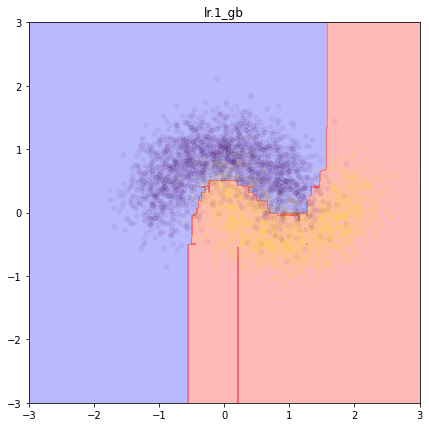

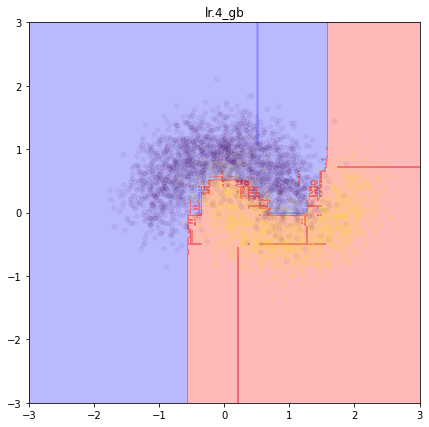

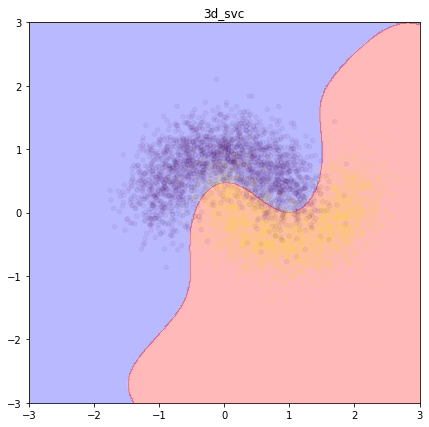

In [100]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train, y_train)
plot(knn1, test, test_true, '3kNN')

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(x_train, y_train)
plot(knn2, test, test_true, '10kNN')

lr = LogisticRegression(C=10, random_state=17)
lr.fit(x_train, y_train)
plot(lr, test, test_true, '1LR')

rf1 = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=17)
rf1.fit(x_train, y_train)
plot(rf1, test, test_true, 'd1_rf')

rf2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=17)
rf2.fit(x_train, y_train)
plot(rf2, test, test_true, 'd2_rf')

rf3 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=17)
rf3.fit(x_train, y_train)
plot(rf3, test, test_true, 'd3_rf')

rf5 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=17)
rf5.fit(x_train, y_train)
plot(rf5, test, test_true, 'd5_rf')

gb1 = GradientBoostingClassifier(learning_rate=0.1, random_state=17)
gb1.fit(x_train, y_train)
plot(gb1, test, test_true, 'lr.1_gb')

gb2 = GradientBoostingClassifier(learning_rate=0.4, random_state=17)
gb2.fit(x_train, y_train)
plot(gb2, test, test_true, 'lr.4_gb')

svc = SVC(degree=3, random_state=17)
svc.fit(x_train, y_train)
plot(svc, test, test_true, '3d_svc')

Auc=0.8952014397202115
model=RandomForestClassifier(max_depth=3)

Auc=0.9002675865976731
model=KNeighborsClassifier()

Auc=0.8517478577167933
model=LogisticRegression()

Auc=0.9146872127232448
model=GradientBoostingClassifier(random_state=17)

Auc=0.9038054433641626
model=GradientBoostingClassifier(learning_rate=0.4, random_state=17)

Auc=0.9169159814831023
model=SVC(random_state=17)

Auc=0.9164714526550127
Meta algorithm



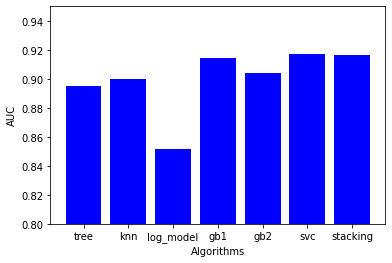

In [142]:
# get data and split data
x, y = make_moons(15000, noise=0.3, random_state=17)

# split data into 2 parts are train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=.7,
                                                    random_state=17)
# devide train into two parts
train, valid, train_true, valid_true  = train_test_split(x_train,
                                                         y_train,
                                                         train_size=.7,
                                                         random_state=17)

#----------------------
# train base algorithms
tree = RandomForestClassifier(max_depth=3).fit(train, train_true)
knn = KNeighborsClassifier(n_neighbors=5).fit(train, train_true)
log_model = LogisticRegression().fit(train, train_true)
gb1 = GradientBoostingClassifier(learning_rate=0.1, random_state=17).fit(train, train_true)
gb2 = GradientBoostingClassifier(learning_rate=0.4, random_state=17).fit(train, train_true)
svc = svc = SVC(degree=3, random_state=17).fit(train, train_true)
models = [tree, knn, log_model, gb1, gb2, svc]

#matrix for train meta
meta_matrix = np.empty((valid.shape[0], len(models)))
#matrix for test meta
meta_matrix_test = np.empty((y_test.shape[0], len(models)))

for n, model in enumerate(models):
    #forming train meta features for meta algorithm
    meta_matrix[:, n] = model.predict(valid)
    #forming test meta features for meta algorithm
    meta_matrix_test[:, n] = model.predict(x_test)
    print(f'Auc={roc_auc_score(y_test, meta_matrix_test[:, n])}\n{model=}\n')
    

meta = GradientBoostingClassifier(n_estimators=60, random_state=17)
meta_model = meta.fit(meta_matrix, valid_true)
predicted = meta_model.predict(meta_matrix_test)
auc = roc_auc_score(y_test, predicted)
print(f'Auc={auc}\nMeta algorithm\n')


# build charts, where by axis yy - values AUC are for all classificatorts and by axis xx  - algorithms.

alg = ['tree', 'knn', 'log_model','gb1' ,'gb2','svc', 'stacking'] # названия алгоритмов
list_auc = [] # auc for meta-alg
for model in models:
    predicted = model.predict(test)
    list_auc.append(roc_auc_score(test_true, predicted))
list_auc.append(auc)
    
plt.bar(np.arange(len(list_auc)), list_auc, color='blue', label='алгоритмы')
plt.xticks(np.arange(len(list_auc)), alg)
plt.ylim([0.8, 0.95])
plt.xlabel('Algorithms')
plt.ylabel('AUC')
plt.show()

## Homework

In [149]:
models = [knn1, knn2, lr, rf1, rf2, rf3, gb2]
#matrix for train meta-data
meta_mtrx = np.empty((valid.shape[0], len(models)))
#matrix for test meta-data
meta_mtrx_test = np.empty((test.shape[0], len(models))) 


for n, model in enumerate(models):
    # train meta-data
    meta_mtrx[:, n] = model.predict(valid)
    # test meta-data
    meta_mtrx_test[:, n] = model.predict(x_test)
    
meta = GradientBoostingClassifier(n_estimators=5, random_state=17)
# обучите мета-модель на валидационных данных
# ваш код

meta_mtrx_test = np.empty((test.shape[0], len(models))) 

for n, model in enumerate(models):
    pass
    
# сделайте предсказания для мета-алгоритма
# ваш код

# выведите график для всех обученных моделей (включая gb1 и svc) и stacking'а, обученного на них
# выведите здесь же график для нового значения auc stacking'а, укажите color='red'
# ваш код

In [148]:
meta_mtrx.shape

(3151, 7)